linear SVM CLASSIFICATION OF LINEAR DATA

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import pandas as pd


In [22]:
df = datasets.load_iris()


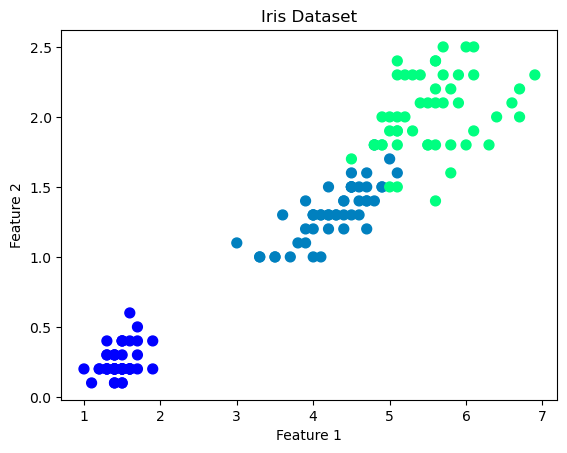

In [23]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:, (2, 3)]  # Selecting specific features
y = iris.target

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='winter')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Iris Dataset')
plt.show()


In [24]:
x = df["data"][:,(2,3)]
y = (df['target']==2).astype(np.float64)


In [25]:
svm_clf = Pipeline((
    ("scaler",StandardScaler() ),
     ("linear_svm", LinearSVC(C=1 , loss = "hinge")),
    ))

In [26]:
svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svm', LinearSVC(C=1, loss='hinge'))])

In [27]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Train the SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X, y)

# Create a meshgrid of feature values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Compute the decision function values for the meshgrid points
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision function and the data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Function of SVM on Iris Dataset')

# Show the plot
plt.show()


ValueError: cannot reshape array of size 120000 into shape (200,200)

# NON LINEAR SVM CLASSIFICATION

In [31]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [34]:
polynomial_svm_clf = Pipeline((
         ("polynomial", PolynomialFeatures()),
         ('scaler standerd', StandardScaler()),
         ("svm_clf",LinearSVC(C = 10, loss = 'hinge') )
))

In [35]:
polynomial_svm_clf.fit(x,y)

C:\anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('scaler standerd', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

# polynomial kernal

In [41]:
from sklearn.svm import SVC
poly_kernal_svm_clf = Pipeline((
            ('scaler standerd', StandardScaler()),
            ('svm_clf',SVC( kernel = "poly", degree = 3, coef0=1, C = 5))
    ))

In [42]:
poly_kernal_svm_clf.fit(x,y)

Pipeline(steps=[('scaler standerd', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

# gaussian rbf kernel

In [43]:
rbf_kernal_svm_clf = Pipeline((
            ('scaler standerd', StandardScaler()),
            ('svm_clf',SVC( kernel = "rbf", gamma = 5, C=0.001))
    ))
rbf_kernal_svm_clf.fit(x,y)

Pipeline(steps=[('scaler standerd', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

# svm regression 

In [45]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(x,y)

LinearSVR(epsilon=1.5)

# for polynimial 

In [47]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel = "poly", degree = 2, C= 100, epsilon =  0.1)
svm_poly_reg.fit(x,y)

SVR(C=100, degree=2, kernel='poly')